# COVID 19 and the rise of Euro Exchange Rates

We all have memories of living through the pandemic.  Whether we hoarded toilet paper, or searched high and low for masks, we all felt the effects of the pandemic.  This project aims to look at how the Euro exchange rate changed from the pre-pandemic to the first year of the pandemic. This exchange rate has effects on imports and exports.  An increase in exchange rates can make exports more expensive and imports less expensive.  

#### Our data

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. We have information on 40 different countries and will primarily be examining the US and Canadian exchange rate.   If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro.

_Daria Chemkaeva put together the data set and made it available on Kaggle. The data source is the European Central Bank._

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

## Data structure and observations

Before we can take a look at the Euro exchange rates, we will have to explore and clean the data.  Some immediate observations are shown below.

Variables:
* All variables are surrounded by brackets
* All variables have spaces in name
* There are missing exchange rates for several countries
* Most variables are listed as objects and not float

There are a total of 5,699 observations and 41 columns.
The first column is the date and the rest of the columns are the exchange rates for each countries money.

In [2]:
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Cleaning the data for use

In order to use the data, we will need to do the following:

* Modify variable names
* Set date column to type datetime
* Sort data by date and reset index
* Modify variables so that they are float and not objects

### Modifying variable names
The raw data have brackets and spacesin the middle of the column names.  The brackets will be removed along with any leading spaces that may be present.  The space in the middle of the names will be replaced with an underscore

In [4]:
# Modifying variable names
col=exchange_rates.columns
new_col = []

for item in col :
    name = item
    name = (name.replace("[", "")
                .replace("]", "")
                .strip()
                .replace(" ", "_")
            )
    new_col.append(name)

new_col[0]= "date"
exchange_rates.columns=new_col

### Correcting Data Types

Several of the columns are listed as objects when they should be either datetime or float.  We will start by converting the date column to datetime.  Then the data will then be sorted by date and indexes will be reset. 

The remaining columns need to be converted to floats.  We will start by inspecting the `US_dollar` column.  We will look for strings and characters that are preventing it from converting to a float.

In [5]:
#Setting the date column as type datetime
exchange_rates['date']=pd.to_datetime(exchange_rates['date'])

In [6]:
# sort data by date and resets index
exchange_rates=exchange_rates.sort_values('date').reset_index(drop=True)
exchange_rates

,date,Australian_dollar,Bulgarian_lev,Brazilian_real,Canadian_dollar,Swiss_franc,Chinese_yuan_renminbi,Cypriot_pound,Czech_koruna,Danish_krone,...,Romanian_leu,Russian_rouble,Swedish_krona,Singapore_dollar,Slovenian_tolar,Slovak_koruna,Thai_baht,Turkish_lira,US_dollar,South_African_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
5695,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
5696,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
5697,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919


#### Exploring the data starting with the `US_dollar`

The variable that is most relevant for the analysis was the `US_dollar`.  This column was explored using the `value_counts()` function.  As you can see below there are 62 rows with entries as dashes.  Initially, I sought to remove the entries with dashes.  In removing the rows and attempting to convert the data to float, the `Israeli_shekel` column has further strings in the data preventing it from converting to a float.  More exploration was be needed. 

In [7]:
#explore US_dollar column
print(exchange_rates['US_dollar'].value_counts())

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
0.9823     1
1.3366     1
1.3341     1
0.8917     1
1.3813     1
Name: US_dollar, Length: 3528, dtype: int64


#### Exploring the `Israeli_shekel`

The `Israeli_shekel` did not have any easily visible signs of a string.  When using the `value_counts()` function as shown below, we can see there are 4606 different values. Initially this variable was explored with rows removed from the dataset.  When the rows were removed, there was no indication there were still dash entries.  However, when all rows were returned we can see there were also dashes in this dataset.

In [8]:
exchange_rates['Israeli_shekel'].value_counts()
#exchange_rates['Israeli_shekel'].head(20)

-         62
5.5731     4
5.5277     4
4.2182     4
4.7535     4
          ..
5.6021     1
4.6194     1
4.0024     1
3.8511     1
4.8907     1
Name: Israeli_shekel, Length: 4606, dtype: int64

Since an answer wasn't easily avaialbe upon initial inspection we proceeded to search for possible characters.  To make things easier to work with, the column was pulled from the data frame.  Then the missing values were removed and any possible character was converted to lowercase. This was done to make the list of possible values to search for smaller.

In [9]:
# looking at the non_null values of the column to find the strings
a=exchange_rates['Israeli_shekel']
bool_series = pd.notnull(a)
a=a[bool_series]

# A further search must be used to determine what string is in the column.
# Making everything lowercase will help with this search
a=a.apply(str.lower)

In [10]:
# possible strings to search for.
find=['a','b','c','d','e','f','g','h','i','j','k','l','m',
      'n','o','p','q','r','s','t','u','v', 'w', 'x', 'y','z',
      ',', ' ', ':', "'", '_', '-']

In [11]:
found_strings=[]

for item in find :
    if a.str.contains(item).any() :
        found_strings.append(item)
        
print(found_strings)

['-']


It turns out this column also had `-` as entries that were not the same rows as the ones for the `US_dollar`.  This lead me to believe multiple columns may have dashes.  The best course of action was to replace any `-` in the entire dataset with missing.

In [12]:
#replace all rows with - to missing
exchange_rates=exchange_rates.replace('-', np.nan)
#exchange_rates['US_dollar']=exchange_rates['US_dollar'].replace('-', np.nan)
#exchange_rates=exchange_rates[exchange_rates["US_dollar"]!= '-']
#exchange_rates['US_dollar'].value_counts()

#### Converting to float

Once all `-` were converted to missing the columns were able to be converted to the float datatype using a loop.

In [13]:
#convert all columns to float 
col=exchange_rates.columns
col=col[1:]
#col=col.drop('Israeli_shekel')
col

for item in col :
    name=item
    exchange_rates[name]=exchange_rates[name].astype(float)

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   5699 non-null   datetime64[ns]
 1   Australian_dollar      5637 non-null   float64       
 2   Bulgarian_lev          5239 non-null   float64       
 3   Brazilian_real         5370 non-null   float64       
 4   Canadian_dollar        5637 non-null   float64       
 5   Swiss_franc            5637 non-null   float64       
 6   Chinese_yuan_renminbi  5370 non-null   float64       
 7   Cypriot_pound          2304 non-null   float64       
 8   Czech_koruna           5637 non-null   float64       
 9   Danish_krone           5637 non-null   float64       
 10  Estonian_kroon         3074 non-null   float64       
 11  UK_pound_sterling      5637 non-null   float64       
 12  Greek_drachma          514 non-null    float64       
 13  Hon

## US dollar and Canadian dollar exchange rates

Since the US and Canada were hit with the pandemic at approximately the same time, we sought to see how the Euro exchange rates changed during the pandemic.  Below is a graph of both Euro exchange rates.  We can see that overall Canada had a higher Exchange rate both before and after the pandemic hit.

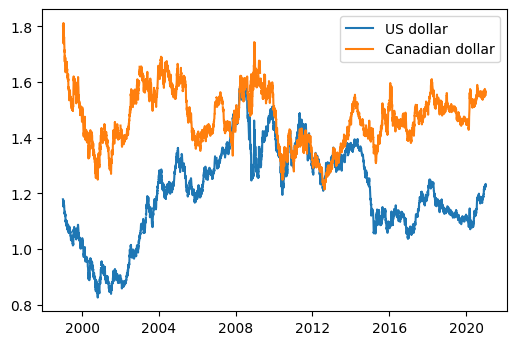

In [14]:
plt.plot(exchange_rates['date'],
         exchange_rates['US_dollar'], label = 'US dollar')
plt.plot(exchange_rates['date'],
         exchange_rates['Canadian_dollar'], label = 'Canadian dollar')
plt.legend()
plt.show()


The graph above shows the Euro exchange rates, however both the US and Canada had different rates at the start of the pandemic.  We are interested in how the exchange rates changed around the time of the pandemic.  To examine this closer, we will utilize the data from 2019 forward.

In [15]:
# Only grabs the exchange rates for 2019 forward.
exchange_rates_pandemic = exchange_rates[exchange_rates['date'].dt.year >= 2019]


In order to look at how much the Euro exchange rate changed, we will get the mean Euro exchange rate for both the US dollar and Canadian dollar.  We will then shift both data columns to zero by subtracting the mean from each observation.

$$
dc_i = c_i - \bar{c}
$$
$$
du_i = u_i - \bar{u}
$$


- c = Canadian dollar
- u = US dollar
- d = difference

In [16]:
mean_US = exchange_rates_pandemic['US_dollar'].mean()
mean_Canada = exchange_rates_pandemic['Canadian_dollar'].mean()

In [17]:
import warnings
warnings.filterwarnings('ignore')
# Gives warning about performing calculations on a subset of the data

exchange_rates_pandemic['US_shift']=exchange_rates_pandemic['US_dollar']-mean_US
exchange_rates_pandemic['Canada_shift']=exchange_rates_pandemic['Canadian_dollar']-mean_Canada


In [18]:
date_2019 = exchange_rates_pandemic['date'][exchange_rates_pandemic['date'].dt.year==2019]
date_2020 = exchange_rates_pandemic['date'][exchange_rates_pandemic['date'].dt.year==2020]
date_2021 = exchange_rates_pandemic['date'][exchange_rates_pandemic['date'].dt.year==2021]
pre_pandemic =  exchange_rates_pandemic[exchange_rates_pandemic['date'].dt.year==2019]
pandemic =  exchange_rates_pandemic[exchange_rates_pandemic['date'].dt.year!=2019]

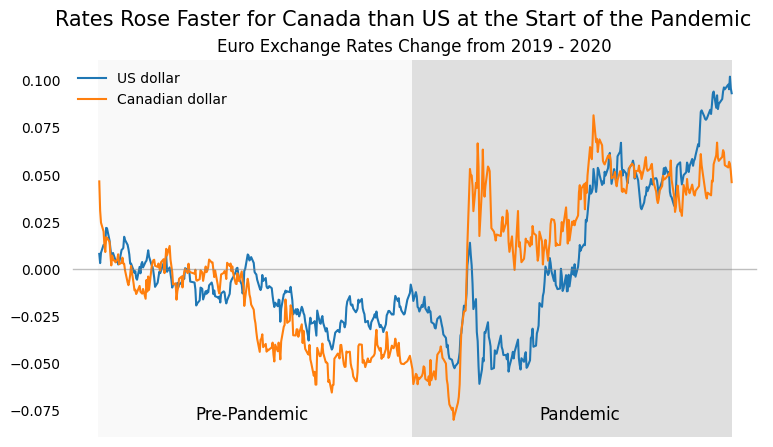

In [19]:
fig, ax = plt.subplots(figsize=(9, 5))

# plots US_dollar time Series
plt.plot(exchange_rates_pandemic['date'],
         exchange_rates_pandemic['US_shift'], label = 'US dollar')
# plots Canadian_dollar time Series
plt.plot(exchange_rates_pandemic['date'],
         exchange_rates_pandemic['Canada_shift'], label = 'Canadian dollar')


# adds zero line
ax.axhline(0, color='grey', linewidth=1, alpha=0.5,xmin=0.01, xmax=0.99)
# removes labbels and ticks
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels([])
# ax.set_yticklabels([])
# removes borders
for spine in ax.spines:
    ax.spines[spine].set_color("None")

# adds background color    
plt.axvspan(exchange_rates['date'][5181],exchange_rates_pandemic['date'][5437] , facecolor='whitesmoke', alpha=0.5)
plt.axvspan(exchange_rates_pandemic['date'][5437],exchange_rates_pandemic['date'][5698] , facecolor='silver', alpha=0.5)

# add mean change line pre-pandemic
#ax.axhline(pre_pandemic['Canada_shift'].mean(), color='r', linewidth=0.5, alpha=0.8,xmin=0.05, xmax=0.5, linestyle='dashed')
#ax.axhline(pre_pandemic['US_shift'].mean(), color='b', linewidth=0.5, alpha=0.8,xmin=0.05, xmax=0.5, linestyle='dashed')

# add mean change line pandemic
#ax.axhline(pandemic['Canada_shift'].mean(), color='r', linewidth=0.5, alpha=0.8,xmin=0.5, xmax=0.95, linestyle='dashed')
#ax.axhline(pandemic['US_shift'].mean(), color='b', linewidth=0.5, alpha=0.8,xmin=0.5, xmax=0.95, linestyle='dashed')


# adds title for each portion of graph
ax.text(exchange_rates['date'][5260], -0.08, s="Pre-Pandemic", size=12)
ax.text(exchange_rates['date'][5540], -0.08, s="Pandemic", size=12)

# adds titles at top
plt.suptitle("Rates Rose Faster for Canada than US at the Start of the Pandemic", fontsize=15)
ax.set_title("Euro Exchange Rates Change from 2019 - 2020", fontsize=12)
plt.legend(frameon=False)
plt.show()

As we can see from the graph above, the Canadian dollar rose faster early in the pandemic than the US dollar.  After the initial spike in Euro exchange Rate both currencies had a decline in exchange rate followed by another increase.  This is when the Canadian dollar starts to differ as the rate on average was the same through the end of the year.  However, the US dollar continued to increase in Euro exchange rates through the end of 2020.

## Conclusion

The events unfolding during the pandemic had an affect on the Euro exchange rate.  The US dollar continued to rise in its Euro exchange rate through the end of 2020, whereas the Canadian dollar Euro exchange rate equalized towards the end of the year.  Since the Euro exchange rate and trade are related this difference is likely due to the amount of trade each country does.  According to ustr.gov "the United States is the largest goods importer in the world." This aligns with the change in the US dollar relative to Canada.  The US needed to import more goods than Canada did during the pandemic.  Keep in mind, supply chains began to fail during this time which led to a scarcity of product.  As a result, the US had to pay the higher prices for the same goods which is a possible explanation for why we see the US dollar exchange rate continue to increase as the Canadian dollar rate began to equalize by the end of 2020.